# POSTTEST 6
### NAMA  : Juniver Veronika Lili
### NIM   : 2209106013
### KELAS : Informatika A1 22

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Membaca File CSV

In [2]:
data = pd.read_csv("Placement_Data_Full_Class.csv")
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


#### kolom dengan nama 'sl_no' dihapus dari DataFrame karena tidak di gunakan, agar saat menganalisis tidak perlu mempertimbangkan kolom tersebut. 

In [3]:
data.drop('sl_no', axis=1, inplace=True)

In [4]:
data["status"] = data["status"].map({"Placed": 1, "Not Placed": 0})
data["status"].value_counts()

1    148
0     67
Name: status, dtype: int64

#### syntax pertama data["status"] = data["status"].map({"Placed": 1, "Not Placed": 0}), kita menggunakan metode .map() untuk mengubah nilai dalam kolom 'status' dari string menjadi bilangan bulat. Dalam kasus ini, nilai "Placed" akan diubah menjadi 1 dan nilai "Not Placed" akan diubah menjadi 0. 

In [5]:
kolom_kategorikal = pd.get_dummies(data,columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'])
kolom_kategorikal

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,270000,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,1,200000,0,1,1,...,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,250000,0,1,1,...,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,1,425000,0,1,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,400000,0,1,0,...,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.00,74.0,53.62,1,275000,0,1,0,...,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.00,59.0,69.72,1,295000,0,1,0,...,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.00,70.0,60.23,1,204000,1,0,0,...,0,1,0,1,0,0,1,0,0,1


In [6]:
X = kolom_kategorikal.drop(columns='status', axis=1)
y = kolom_kategorikal['status']

#### untuk membagi dataset menjadi data latih (train set) dan data uji (test set) menggunakan fungsi train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(172, 22)

#### 'X_train.shape' digunakan untuk mendapatkan bentuk (shape) dari array atau DataFrame X_train, agar kita bisa mengetahui berapa banyak sampel data(baris) dan berapa banyak fitur (kolom) yang ada dalam data latih yang digunakan untuk melatih model.

In [84]:
model = Sequential([
    layers.Dense(36, activation='relu', input_shape=[22]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss="binary_crossentropy",
             metrics=['accuracy'])

#### menggunakan syntax ini, Anda telah membuat sebuah model neural network dengan arsitektur tertentu (berisi layer-layer Dense dengan fungsi aktivasi ReLU dan Sigmoid), mengonfigurasi model untuk pelatihan menggunakan optimizer Adam, menggunakan binary crossentropy sebagai fungsi kerugian, dan memonitor akurasi sebagai metrik performa selama pelatihan.

In [85]:
print(X_train.shape)
print(y_train.shape)

(172, 22)
(172,)


#### Syntax print(X_train.shape) dan print(y_train.shape) digunakan untuk mencetak dimensi atau bentuk (shape) dari data pelatihan (X_train dan y_train).

In [86]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 2s 126ms/step - loss: 56235.1484 - accuracy: 0.3212 - val_loss: 47271.4219 - val_accuracy: 0.3143
Epoch 2/50
5/5 [==============================] - 0s 27ms/step - loss: 46650.1836 - accuracy: 0.3212 - val_loss: 38642.6445 - val_accuracy: 0.3143
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 38318.9766 - accuracy: 0.3212 - val_loss: 31624.5566 - val_accuracy: 0.3143
Epoch 4/50
5/5 [==============================] - 0s 25ms/step - loss: 31009.1797 - accuracy: 0.3212 - val_loss: 25492.6953 - val_accuracy: 0.3143
Epoch 5/50
5/5 [==============================] - 0s 25ms/step - loss: 24708.6465 - accuracy: 0.3212 - val_loss: 19371.3828 - val_accuracy: 0.3143
Epoch 6/50
5/5 [==============================] - 0s 26ms/step - loss: 18307.7871 - accuracy: 0.3212 - val_loss: 13218.6445 - val_accuracy: 0.3143
Epoch 7/50
5/5 [==============================] - 0s 28ms/step - loss: 11753.2480 - accuracy: 0.3212 - val_loss: 7171

In [87]:
score = model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 8ms/step - loss: 1.8118e-33 - accuracy: 1.0000


[1.811760606576598e-33, 1.0]

#### 'score = model.evaluate(X_test, y_test)': Model dievaluasi menggunakan data uji (X_test) dan label uji (y_test). Fungsi evaluate mengembalikan nilai-nilai metrik performa model yang telah ditentukan selama proses kompilasi model.

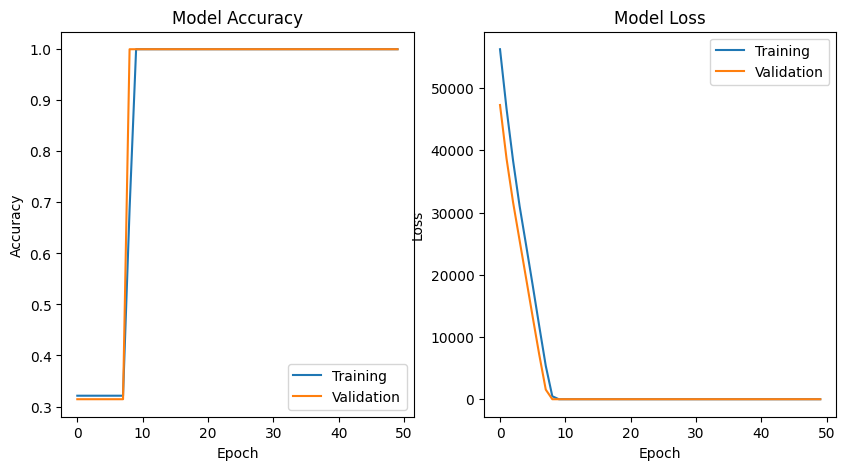

In [88]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

print('\n')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.show()

#### digunakan untuk memvisualisasikan metrik pelatihan dan validasi dari model. Grafik akurasi membantu melihat sejauh mana model dapat mengklasifikasikan data dengan benar, sementara grafik kerugian membantu melihat seberapa baik model belajar selama proses pelatihan.